In [5]:
symbol1='^NSEBANK'
symbol2='^NSEI'
dur = '1d'

In [6]:
def get_stock_data(symbol,p,i):
    import yfinance as yf
    data = yf.download(symbol,period=p,interval=i)
    return data

def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

def get_hh_mm_time(data_df):
    data_df=data_df.reset_index()
    data_df["Datetime"] = pd.to_datetime(data_df["Datetime"])
    data_df["Datetime"] = data_df["Datetime"].dt.strftime('%H:%M')
    data_df=data_df.set_index("Datetime")
    data_df.index = pd.to_datetime(data_df.index)
    return data_df

def pdh_pdl_pdc_plot(val,col):
    plt.axhline(val, color=col, linestyle='--')
    
def pdh_pdl_pdc_calc_pdh(df):
    return df["High"][0],df["Low"][0],df["Close"][0]

def pdh_pdl_pdc_calc_range(df):
    return df["High"].max(),df["Low"].min(),(df["High"].max()+df["Low"].min())/2

def mpl_candlesticks_pdh(title,df,d,axes,df_close):
    mpf.plot(df, type='candle', ax=axes)
    plt.title(title+" {}".format(d))
    pdh,pdl,pdc = pdh_pdl_pdc_calc_pdh(df_close)
    pdh_pdl_pdc_plot(pdh,'red')
    pdh_pdl_pdc_plot(pdl,'darkgreen')
    pdh_pdl_pdc_plot(pdc,'yellow')
    plt.tight_layout()

def mpl_candlesticks_range(title,df,d,axes,df_close):
    mpf.plot(df, type='candle', ax=axes)
    plt.title(title+" {}".format(d))
    pdh,pdl,pdc = pdh_pdl_pdc_calc_range(df_close)
    pdh_pdl_pdc_plot(pdh,'red')
    pdh_pdl_pdc_plot(pdl,'darkgreen')
    pdh_pdl_pdc_plot(pdc,'gray')
    plt.tight_layout()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


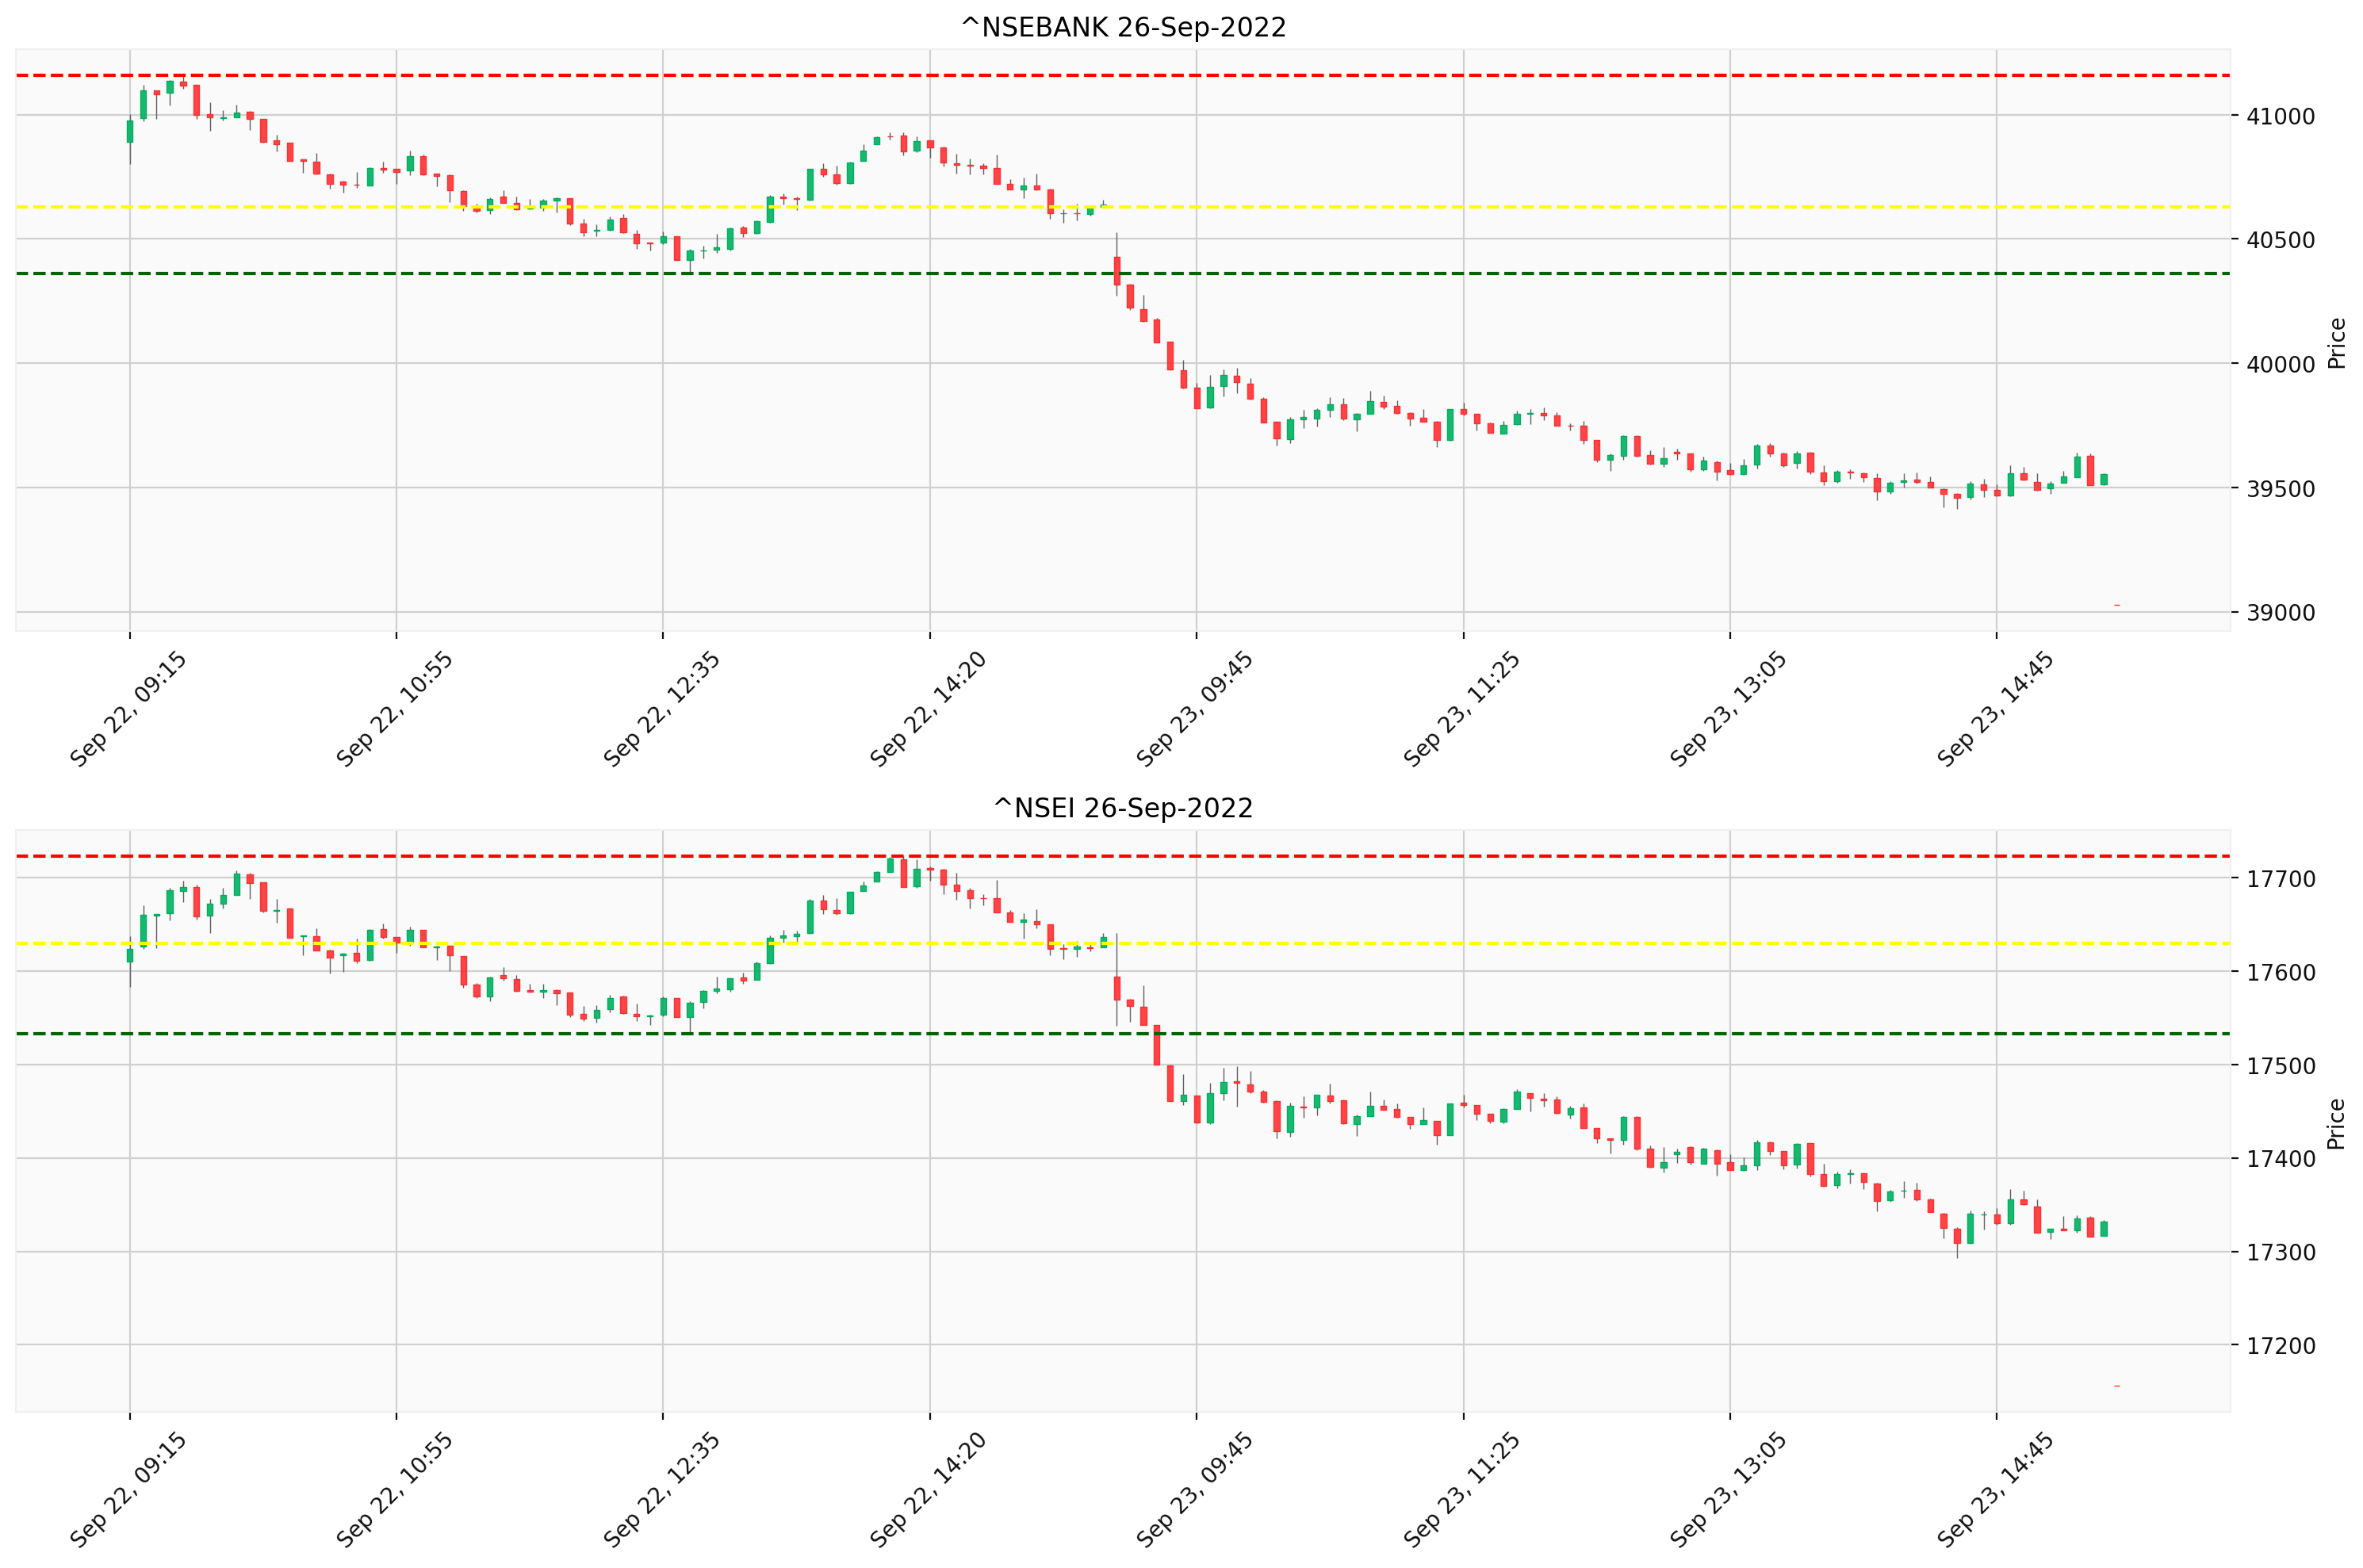

In [7]:
################################################################
################  MAIN PROGRAM #################################

import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


# symbol1='RELIANCE.NS'
# symbol2='TCS.NS'
bnf=get_stock_data(symbol1,'2d','5m')
nf=get_stock_data(symbol2,'2d','5m')
bnf_pdc=get_stock_data(symbol1,'2d','1d')
nf_pdc=get_stock_data(symbol2,'2d','1d')

today = get_today_date()
# print(today)
# print(symbol1)

s = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 10})
fig = mpf.figure(figsize=(15, 10), style=s) 
ax = fig.add_subplot(2,1,1) 
mpl_candlesticks_pdh(symbol1,bnf,today,ax,bnf_pdc)
av = fig.add_subplot(2,1,2) 
mpl_candlesticks_pdh(symbol2,nf,today,av,nf_pdc)


##  Last 5-days closing

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


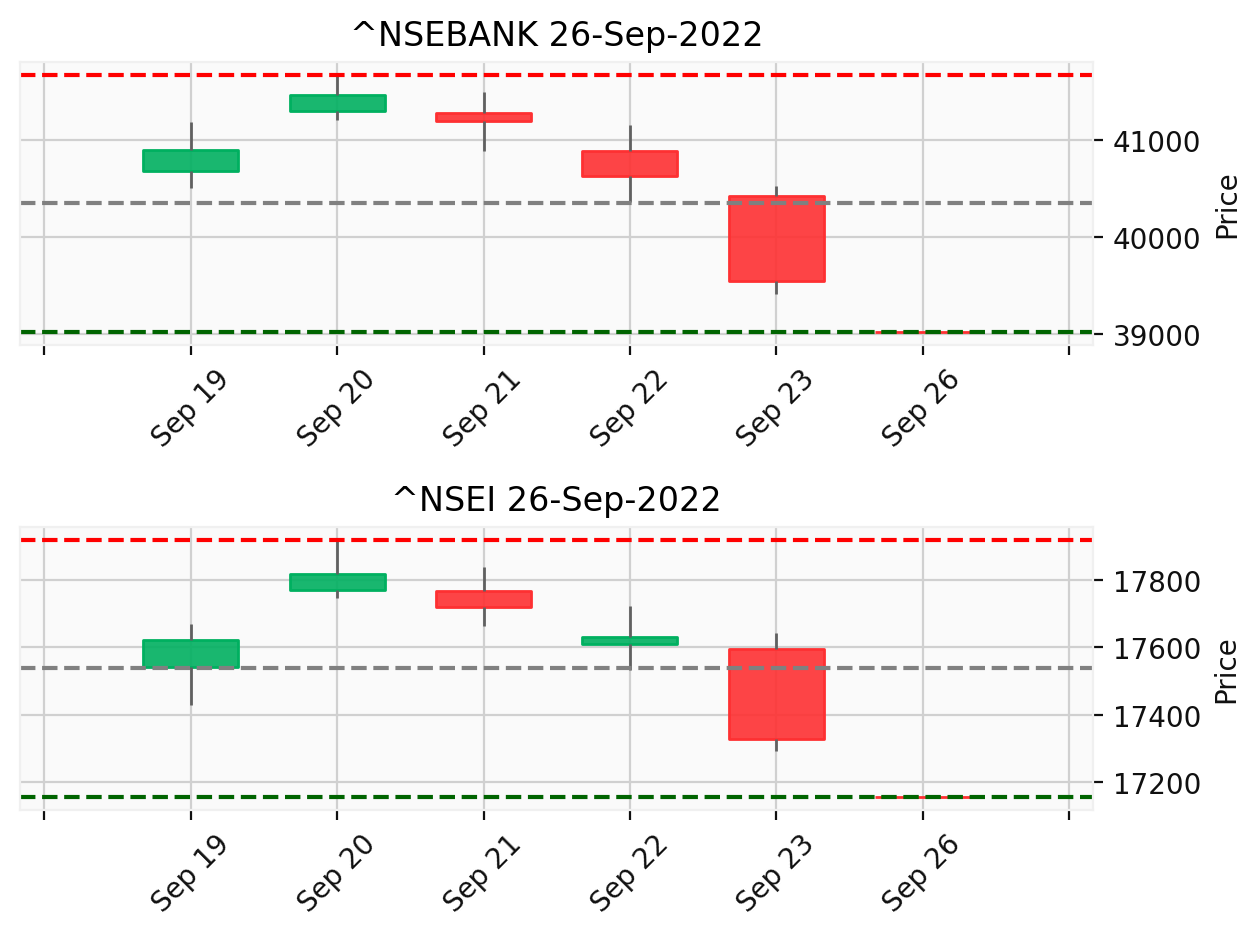

In [8]:
bnf=get_stock_data(symbol1,'5d',dur)
nf=get_stock_data(symbol2,'5d',dur)
bnf_pdc=get_stock_data(symbol1,'5d','1d')
nf_pdc=get_stock_data(symbol2,'5d','1d')

today = get_today_date()
# print(today)
# # print(symbol1)

s = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 10})
fig = mpf.figure(figsize=(15, 10), style=s) 
# fig = mpf.figure(style=s) 

ax = fig.add_subplot(2,1,1) 
mpl_candlesticks_range(symbol1,bnf,today,ax,bnf_pdc)
av = fig.add_subplot(2,1,2) 
mpl_candlesticks_range(symbol2,nf,today,av,nf_pdc)